In [113]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from time import time

In [114]:
@njit(parallel=True)
def energy(Lx, Ly, kT):
    """
    Эта функция возвращает массив энергий для молекул при модели изинга с параметрами:
    Lx - количество по Ох
    Ly - количество по Оу
    kT - постаянная Больцмана при заданной температуре в Кельвинах
    """
    N = Lx * Ly
    energy = 0
    e = 0
    Z = 0
    for i in prange(2**N):
        E = 0
        sigma = np.empty(N, dtype=np.int8)
        x = np.int64(i)
        for j in range(N):
            sigma[j] = (x & 1) * 2 - 1
            x = x >> 1
        sigma = sigma.reshape(Lx, Ly)
        for l in range(-1, Lx-1):
            for j in range(-1, Ly-1):
                E -= sigma[l, j] * (sigma[l, j + 1] + sigma[l + 1, j])
        e = np.exp(- E / kT)
        Z += e
        energy += e * E
        
    return energy/(Z*N)

In [115]:
# Считаем среднюю энергию для модели Изинга при различных Lx и kT, указанных в условии:
main = np.empty((7, 40), dtype = float)
kT = np.arange(1, 5, 0.1)
Lx = np.arange(2, 9, 1)
for l in range(len(Lx)):
    start = time()
    for T in range(len(kT)):
        main[l, T] = energy(Lx[l], 4, kT[T])
    end = time()
    print(f'Time for calculating with Lx = {Lx[l]}: {end - start}')


Time for calculating with Lx = 2: 0.4092531204223633
Time for calculating with Lx = 3: 0.00427699089050293
Time for calculating with Lx = 4: 0.025111913681030273
Time for calculating with Lx = 5: 0.39430689811706543
Time for calculating with Lx = 6: 5.796494960784912
Time for calculating with Lx = 7: 87.17719602584839
Time for calculating with Lx = 8: 2608.4205498695374


In [116]:
#Сохраняем массив в файл

np.save('mainArray.npy', main)

In [117]:
# Убеждаемся в правильности расчетов, сверив их с данными для Lx = 4, 5 из условия задачи

proveResults = np.load('mainArray.npy')
print(f'\nРасчеты для Lx = 4: \n\n {proveResults[2]}\n\n Для Lx = 5: \n\n {proveResults[3]}\n')
print('Видим, что результаты подсчета программы равны результатам для самопроверки.')


Расчеты для Lx = 4: 

 [-1.99715844 -1.99396091 -1.98856632 -1.98016965 -1.96786355 -1.95064256
 -1.9274244  -1.89711215 -1.85871667 -1.81153907 -1.75538029 -1.69071311
 -1.61874282 -1.54131149 -1.46065977 -1.37911648 -1.29880759 -1.22145424
 -1.14828469 -1.0800446  -1.01706963 -0.95938399 -0.90679838 -0.85899291
 -0.8155803  -0.77615005 -0.74029707 -0.70763857 -0.67782287 -0.65053286
 -0.62548613 -0.60243323 -0.58115501 -0.56145948 -0.5431787  -0.52616582
 -0.5102923  -0.49544555 -0.48152673 -0.46844889]

 Для Lx = 5: 

 [-1.99715893 -1.99396296 -1.98857263 -1.98018387 -1.96788363 -1.95063964
 -1.92729692 -1.89661121 -1.85735639 -1.80853133 -1.74965024 -1.68103752
 -1.60399878 -1.52075577 -1.43412763 -1.3470633  -1.26219309 -1.18153361
 -1.10638872 -1.03740747 -0.97472647 -0.918132   -0.86720255 -0.82141645
 -0.78022445 -0.74309384 -0.70953215 -0.67909749 -0.65140075 -0.62610332
 -0.60291264 -0.58157686 -0.56187952 -0.54363452 -0.52668165 -0.51088271
 -0.49611811 -0.48228409 -0.46929

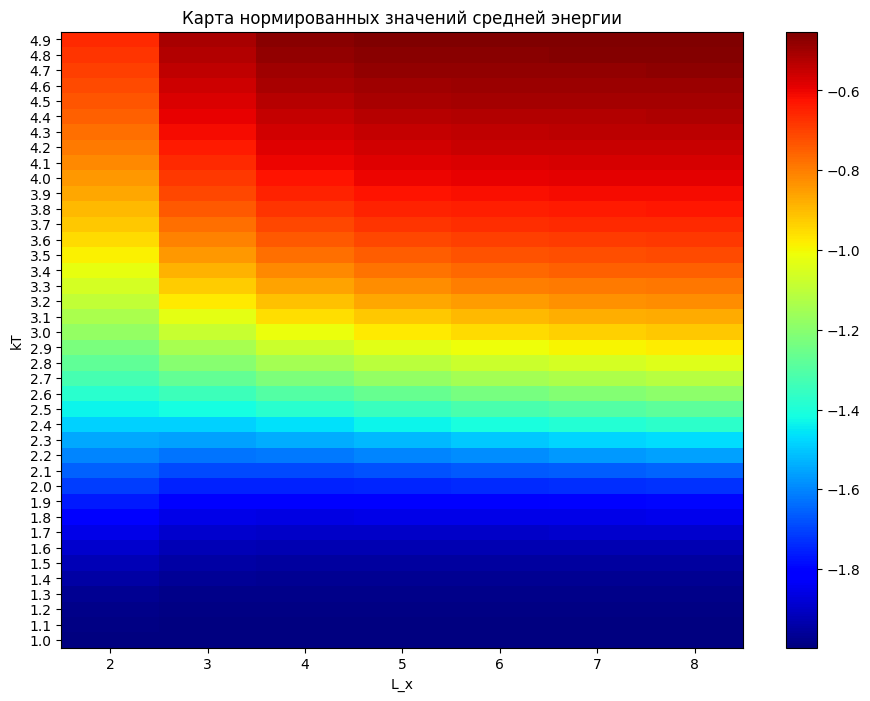

In [121]:
#Отобразим цветовую карту:


proveResults = proveResults.transpose()

plt.figure(figsize=(11, 8))
plt.pcolormesh(Lx, kT, proveResults, cmap = 'jet')
plt.xlabel('L_x')
plt.ylabel('kT')
plt.yticks(kT)
plt.colorbar()
plt.title('Карта нормированных значений средней энергии')
plt.show()

In [119]:
#Выводим все значения для энергий

for i in range(7):
    print(f'\nLx = {i+2}:\n')
    print(main[i])


Lx = 2:

[-1.99509474 -1.98967862 -1.98074878 -1.96731117 -1.94851445 -1.92375828
 -1.89277291 -1.85565639 -1.81286316 -1.76514762 -1.71347563 -1.65892227
 -1.60257405 -1.5454491  -1.48844224 -1.43229537 -1.3775895  -1.3247523
 -1.27407538 -1.22573609 -1.17982015 -1.13634286 -1.09526756 -1.05652101
 -1.02000562 -0.98560898 -0.9532109  -0.92268862 -0.89392045 -0.86678827
 -0.84117913 -0.8169862  -0.79410926 -0.77245486 -0.75193626 -0.73247322
 -0.71399168 -0.69642337 -0.67970548 -0.66378023]

Lx = 3:

[-1.99711779 -1.99383665 -1.98825271 -1.97949351 -1.96659182 -1.94853206
 -1.92432618 -1.89312223 -1.85433583 -1.80777902 -1.75375117 -1.69305981
 -1.62695673 -1.55700043 -1.48487836 -1.41223059 -1.34050963 -1.27089443
 -1.20425882 -1.14118312 -1.08199278 -1.02680913 -0.97560137 -0.92823315
 -0.88450084 -0.84416295 -0.80696158 -0.77263715 -0.7409381  -0.71162671
 -0.68448222 -0.65930219 -0.63590256 -0.61411702 -0.5937959  -0.57480491
 -0.55702372 -0.54034463 -0.52467121 -0.50991714]

Lx =